In [2]:
import sys
import glob
import os
sys.path.append("..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from util.StockDataset import StockData

from GHMM import GHMM

In [6]:
def collecting_results(folder, test_size):
    files = glob.glob(folder + '*')
    for f in files:
        if f.find('.') != -1:
            f = f.split(folder)[-1].split(".")[-2]
        f = f.replace('-', '.')
        predictor = GHMM()
        df = pd.read_csv(folder + f + '.csv', 
                            parse_dates=True, 
                            index_col='Date').dropna(how="any")
        X_train, X_test = train_test_split(df, test_size=test_size, shuffle=False)
        predictor.fit(X_train)
        y_pred = predictor.predict(X_test, plot=False)

        days = np.array(X_test.index, dtype="datetime64[ms]")
 
        fig = plt.figure()
 
        axes = fig.add_subplot(111)
        axes.plot(days, X_test['Close'], 'bo-', label="actual")
        axes.plot(days, y_pred, 'r+-', label="predicted")
 
        fig.autofmt_xdate()
        plt.title(f)
        plt.legend()
        plt.savefig("../../results/probabilistic/" + f + ".png", dpi=300)

In [4]:
collecting_results('../../stock/', test_size=0.05)

NameError: name 'StockRegressorHMM' is not defined

In [4]:
df = pd.read_csv('../../stock/AAPL.csv', parse_dates=True, index_col='Date')
X_train, X_test = train_test_split(df, test_size=0.05, shuffle=False)

In [5]:
predictor = GHMM()
predictor.fit(X_train)

NameError: name 'StockRegressorHMM' is not defined

100%|██████████| 76/76 [00:40<00:00,  1.88it/s]


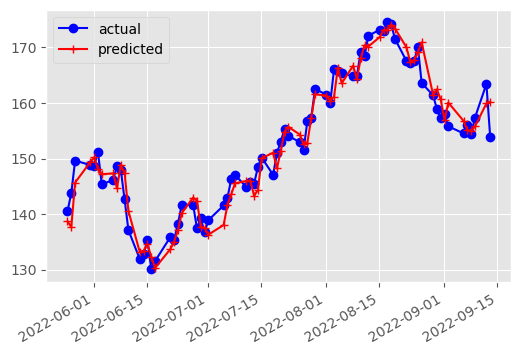

In [ ]:
y_pred = predictor.predict(X_train[-len(X_test):], plot=True)

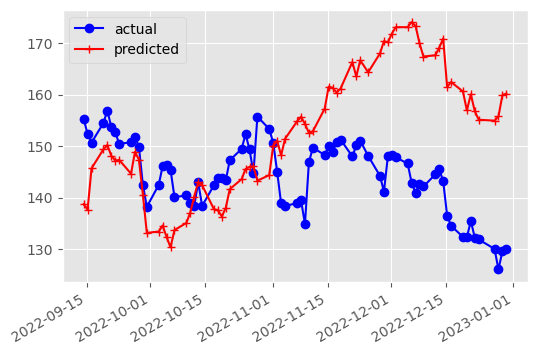

In [ ]:
days = np.array(X_test.index, dtype="datetime64[ms]")
 
fig = plt.figure()
 
axes = fig.add_subplot(111)
axes.plot(days, X_test['Close'], 'bo-', label="actual")
axes.plot(days, y_pred, 'r+-', label="predicted")
 
fig.autofmt_xdate()
plt.legend()